In [128]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import datetime

import matplotlib.pyplot as plt

from tqdm import tqdm

import feather

In [2]:
# Load in the time_series from the previous stage in the pipeline
time_series = feather.read_dataframe("../data_files/B/once/75days/10mins/diff_percent_from_code_-_full_segment_time_series.feather")
time_series = time_series.set_index(time_series.columns[0])


In [113]:
time_series5 = feather.read_dataframe("../data_files/B/once/75days/5mins/diff_percent_from_code_-_full_segment_time_series.feather")
time_series5 = time_series5.set_index(time_series5.columns[0])



In [119]:
time_series1 = feather.read_dataframe("../data_files/B/once/75days/1hour/diff_percent_from_code_-_full_segment_time_series.feather")
time_series1 = time_series1.set_index(time_series1.columns[0])



In [89]:
time_series.shape

(8821, 1154)

In [92]:
time_wide = pd.concat([time_series, time_series.shift(1)], axis=1)

In [114]:
time_wide5 = pd.concat([time_series5, time_series5.shift(1)], axis=1)

In [120]:
time_wide1 = pd.concat([time_series1, time_series1.shift(1)], axis=1)

In [142]:
correlations = time_wide.corr(method="pearson", min_periods=10)
correlations = correlations.fillna(value=float("-inf"))



In [115]:
correlations5 = time_wide5.corr(method="pearson", min_periods=10)
correlations5 = correlations5.fillna(value=float("-inf"))



In [121]:
correlations1 = time_wide1.corr(method="pearson", min_periods=10)
correlations1 = correlations1.fillna(value=float("-inf"))




In [143]:
correlations = correlations.iloc[:time_series.shape[1], time_series.shape[1]:]

best_correlations = pd.DataFrame(
    np.fliplr(
        correlations.columns[np.argsort(correlations.values, axis=1)[:, -30:]]
    ),
    index=correlations.index,
)

In [144]:
best_correlations.index[:,None].shape

(1154, 1)

In [145]:
best_correlations.values.shape

(1154, 30)

In [146]:
np.sort(correlations.values, axis=1)[:, -30:].shape

(1154, 30)

In [157]:
best_correlations = pd.DataFrame(np.column_stack([best_correlations.values, np.fliplr(np.sort(correlations.values, axis=1)[:, -30:])]), index=correlations.index)




In [158]:
best_correlations

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
1200BOB20136_1200BOB20141_0.0,0,0,1200BOB20136_1200BOB20141_0.0,1290DOB21050_1290DOB21052_1.0,1280BOB20036_1280BOB20034_1.0,1290DOB21150_1290DOB21153_1.0,1290DOB20983_1290DOB20981_1.0,1290DOB21019_1290DOB21018_0.0,1290DOB21204_1200POA10917_0.0,1290BOB20068_1290BOB20066_1.0,...,0.214753,0.207875,0.206751,0.205514,0.199762,0.197403,0.193365,0.188475,0.185467,0.184819
1200BOB20136_1200DOY29324_0.0,1,1,1200BOB20136_1200DOY29324_0.0,1200DOA90963_1200DOA25207_0.0,1280POA11490_1280POA11488_0.0,1290DOB20934_1290DOB20932_0.0,1280BOB20510_1290BOB20512_0.0,1280POA11492_1280POA11490_0.0,1290DOB20932_1290BOB20091_0.0,1280POA11251_1280POA11253_0.0,...,0.263973,0.252794,0.245532,0.243346,0.238297,0.236839,0.231662,0.231554,0.228334,0.227958
1200BOB20137_1200DOB21235_0.0,2,2,1200BOB20137_1200DOB21235_0.0,1200BOB20137_1200DOB21235_0.0,1290DOB20939_1290DOB20942_0.0,1290BOB20391_1290BOB20392_0.0,1290BOA56572_1290BOA05335_1.0,1290BOB20203_1290BOB20222_0.0,1200DOB21235_1200DOB21233_0.0,1200DOB21233_1200DOB21231_0.0,...,0.279357,0.269716,0.269259,0.268818,0.267182,0.260336,0.25957,0.25584,0.249233,0.247806
1200BOB20141_1200BOB20144_1.0,3,3,1200BOB20141_1200BOB20144_1.0,1290BOB20391_1290BOB20392_0.0,1290BOB20090_1290DOB20931_1.0,1290DOB21150_1290DOB21153_1.0,1290BOB20454_1290BOB20332_0.0,1200BOB20141_1200BOB20144_1.0,1290DOB21083_1290DOB21080_0.0,1290DOB20984_1290DOB21004_1.0,...,0.222889,0.221445,0.220514,0.218805,0.216401,0.214315,0.208214,0.207952,0.202683,0.201264
1200BOB20142_1200DOY29325_0.0,4,4,1200BOB20142_1200DOY29325_0.0,1290POZ00751_1290BOB20521_0.0,1280POA11591_1280POA11588_1.0,1290BOA05874_1290DOB21062_0.0,1290BOA05874_1290DOB21062_1.0,1290BOA05876_1290BOB20449_0.0,1290BOA05879_1290BTX38434_0.0,1290BOA05879_1290BTX38434_1.0,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1200BOB20142_1200DOY29325_1.0,5,5,1200BOB20142_1200DOY29325_1.0,1290DOB21113_1290DOB21110_0.0,1280POA90830_1280DOB20944_1.0,1290BOB20211_1290BOB20209_0.0,1290BOB20468_1290BOB20475_0.0,1290DOB21083_1290DOB21080_0.0,1290DOB20995_1290DOB20991_0.0,1290DOB20984_1290DOB21004_1.0,...,0.223585,0.222989,0.215672,0.205678,0.205521,0.204479,0.202263,0.197004,0.19689,0.195422
1200BOB20142_1200POA10900_0.0,6,6,1200BOB20142_1200POA10900_0.0,1290DOB20984_1290DOB21004_1.0,1290DOB21067_1290BOB20354_1.0,1290DOB21020_1290DOB21023_0.0,1290BOB20402_1290BOB20380_1.0,1290BOB20128_1290BOB20125_0.0,1290BOB20005_1290BOB20007_0.0,1290BOB20312_1290BOB20317_0.0,...,0.237634,0.236552,0.234472,0.230811,0.22921,0.227857,0.22471,0.219708,0.212898,0.210827
1200BOB20142_1200POA10900_1.0,7,7,1200BOB20142_1200POA10900_1.0,1290BOB20068_1290BOB20066_1.0,1290DOB21068_1290DOB21072_0.0,1290DOB20964_1290DOB20962_0.0,1290BOB20211_1290BOB20209_0.0,1290DOB20984_1290DOB21004_1.0,1290DOB21149_1290DOB21184_0.0,1290BOA56572_1290BOA05335_1.0,...,0.194844,0.185116,0.180943,0.179869,0.17679,0.175818,0.174863,0.169514,0.169191,0.168258
1200BOB20144_1200BOB20146_0.0,8,8,1200BOB20144_1200BOB20146_0.0,1290BOB20454_1290BOB20332_0.0,1290DOB21083_1290DOB21080_0.0,1290DOB21161_1290DOB21162_0.0,1290DOB21185_1290DOB21188_1.0,1290DOB21075_1290DOB21106_1.0,1290DOB20939_1290DOB20942_0.0,1290BOB20293_1290BOB20294_0.0,...,0.242944,0.24145,0.237105,0.236036,0.229952,0.226441,0.223363,0.222903,0.222722,0.219133
1200BOB20146_1200BOB20149_0.0,9,9,1200BOB20146_1200BOB20149_0.0,1290DOB21113_1290DOB21110_0.0,1280BOB20036_1280BOB20034_1.0,1280POA11717_1280POA11714_1.0,1200POA10952_1200BOB20148_0.0,1290DOB21213_1290DOB21210_1.0,1200BOB20148_1200BOB20147_0.0,1200BOB20147_1200BOB20142_0.0,...,0.230587,0.229938,0.227791,0.223389,0.222598,0.221034,0.216782,0.215614,0.21344,0.213249


In [116]:
correlations5 = correlations5.iloc[:time_series5.shape[1], time_series5.shape[1]:]

best_correlations5 = pd.DataFrame(
    np.fliplr(
        correlations5.columns[np.argsort(correlations5.values, axis=1)[:, -31:-1]]
    ),
    index=correlations5.index,
)

In [122]:
correlations1 = correlations1.iloc[:time_series1.shape[1], time_series1.shape[1]:]

best_correlations1 = pd.DataFrame(
    np.fliplr(
        correlations1.columns[np.argsort(correlations1.values, axis=1)[:, -31:-1]]
    ),
    index=correlations1.index,
)

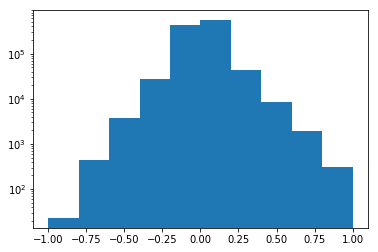

In [103]:
plt.hist(correlations.values.flatten(), range=(-1,1))
plt.yscale("log")
plt.show()

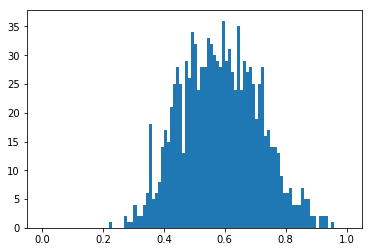

In [117]:
plt.hist(np.sort(correlations.values, axis=1)[:, -2:-1].flatten(), bins=100, range=(0,1))
plt.show()


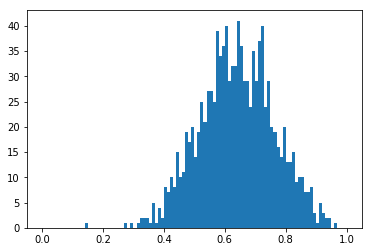

In [118]:
plt.hist(np.sort(correlations5.values, axis=1)[:, -2:-1].flatten(), bins=100, range=(0,1))
plt.show()

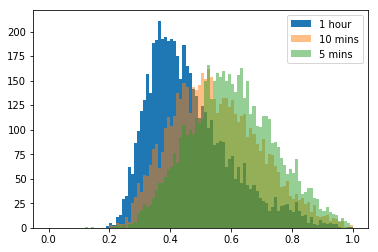

In [127]:
plt.hist(np.sort(correlations1.values, axis=1)[:, -5:].flatten(), bins=100, range=(0,1), label="1 hour")
plt.hist(np.sort(correlations.values, axis=1)[:, -5:].flatten(), bins=100, range=(0,1), alpha=0.5, label="10 mins")
plt.hist(np.sort(correlations5.values, axis=1)[:, -5:].flatten(), bins=100, range=(0,1), alpha=0.5, label="5 mins")
plt.legend()
plt.show()

In [159]:
df = pd.DataFrame()

In [160]:
df['one'] = range(20)
df['two'] = df['one'].shift(1)

In [161]:
df

,one,two
0,0,NaN
1,1,0.0
2,2,1.0
3,3,2.0
4,4,3.0
5,5,4.0
6,6,5.0
7,7,6.0
8,8,7.0
9,9,8.0
